# Exploratory data analysis
- Get to know the domain
- Explore your data
- Clean your data
- Take a look and find connections between data
    Note: Above you have your data set in a folder but for further reference here is the data set 

# Visualization
- Plot your data in a meaningful way
## Predictions
- Do you have any hypothesis?
- Can you make any kind of prediction: regression and/or classification?
# Storytelling
- What metrics are you obtaining?
- Explain your conclusions
- Shape your new data and conclusions in such a way that is appealing to the listener and tells a story

In [1]:
import pandas as pd
import seaborn as sns


In [2]:
file = "data/measurements.csv"
df = pd.read_csv(file)

In [3]:
df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
383,16,"3,7",39,"24,5",18,NaN,SP98,0,0,0,NaN,NaN
384,"16,1","4,3",38,25,31,AC,SP98,1,0,0,NaN,NaN
385,16,"3,8",45,25,19,NaN,SP98,0,0,0,NaN,NaN
386,"15,4","4,6",42,25,31,AC,SP98,1,0,0,NaN,NaN


In [4]:
#cheking data types
df.dtypes

distance         object
consume          object
speed             int64
temp_inside      object
temp_outside      int64
specials         object
gas_type         object
AC                int64
rain              int64
sun               int64
refill liters    object
refill gas       object
dtype: object

In [5]:
df.distance = df.distance.str.replace(',', '.').astype(float)
df.consume = df.consume.str.replace(',', '.').astype(float)
df.gas_type = df.gas_type.astype(str)
df.temp_inside = df.temp_inside.str.replace(',', '.').astype(float)

In [6]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [7]:
df.temp_inside = df.temp_inside.fillna(df.temp_inside.mean())
df.distance = df.distance.fillna(df.distance.mean())
df.consume = df.consume.fillna(df.consume.mean())

In [8]:
df.isna().sum()

distance           0
consume            0
speed              0
temp_inside        0
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [9]:
refill_df = df.loc[df["refill liters"] == df["refill liters"]]
refill_df

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28.0,5.0,26,21.5,12,NaN,E10,0,0,0,45,E10
44,5.4,3.3,32,21.5,7,NaN,SP98,0,0,0,"37,6",SP98
82,10.5,3.6,42,20.0,10,NaN,SP98,0,0,0,"37,7",SP98
106,162.7,5.5,75,23.0,1,NaN,SP98,0,0,0,45,SP98
139,16.1,5.4,24,21.5,7,rain,E10,0,1,0,38,E10
171,44.4,4.8,38,21.5,8,NaN,E10,0,0,0,"38,3",E10
191,43.7,4.7,44,22.0,9,half rain half sun,SP98,0,1,0,10,SP98
192,12.1,4.2,43,22.0,4,NaN,SP98,0,0,0,39,SP98
234,19.0,4.5,29,22.5,10,NaN,E10,0,0,0,39,E10
274,25.7,4.9,50,22.0,10,rain,SP98,0,1,0,41,SP98


In [10]:
# Dropping columns with with high number of missing values as they will not contribute to the analysis.
df.drop(columns=["specials","refill liters","refill gas"],inplace=True)
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26,21.5,12,E10,0,0,0
1,12.0,4.2,30,21.5,13,E10,0,0,0
2,11.2,5.5,38,21.5,15,E10,0,0,0
3,12.9,3.9,36,21.5,14,E10,0,0,0
4,18.5,4.5,46,21.5,15,E10,0,0,0


In [11]:
# Making a new column for fuel economy as km\L 
df["fuel_economy"] = df.apply(lambda x: 100/x.consume, axis=1)
df["fuel_economy"] = round(df["fuel_economy"],2)
df.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,fuel_economy
0,28.0,5.0,26,21.5,12,E10,0,0,0,20.00
1,12.0,4.2,30,21.5,13,E10,0,0,0,23.81
2,11.2,5.5,38,21.5,15,E10,0,0,0,18.18
3,12.9,3.9,36,21.5,14,E10,0,0,0,25.64
4,18.5,4.5,46,21.5,15,E10,0,0,0,22.22


In [12]:
df.AC.value_counts()

AC
0    358
1     30
Name: count, dtype: int64

In [13]:
df.consume.describe()

count    388.000000
mean       4.912371
std        1.033172
min        3.300000
25%        4.300000
50%        4.700000
75%        5.300000
max       12.200000
Name: consume, dtype: float64

In [14]:
df.distance.describe()

count    388.000000
mean      19.652835
std       22.667837
min        1.300000
25%       11.800000
50%       14.600000
75%       19.000000
max      216.100000
Name: distance, dtype: float64

In [15]:
df = df.where(df.distance > 10)
df = df.where(df.distance < 20)

In [16]:
df.fuel_economy.describe()

count    331.000000
mean      21.531934
std        2.822953
min       14.080000
25%       19.610000
50%       21.280000
75%       23.810000
max       27.780000
Name: fuel_economy, dtype: float64

In [ ]:
df = df.where(df.fuel_economy > 19)
df = df.where(df.fuel_economy < 24)

In [17]:
# fuel economy by fuel type
bygas = df.groupby("gas_type")

In [18]:
# the higher the fuel economy the better
E10_ERating = round(bygas.get_group("E10").fuel_economy.mean(),2)
print(f"The fuel economy rating of E10 fuel is {E10_ERating}")

The fuel economy rating of E10 fuel is 21.27


In [19]:
SP98_ERating = round(bygas.get_group("SP98").fuel_economy.mean(),2)
print(f"The fuel economy rating of SP98 fuel is {SP98_ERating}")

The fuel economy rating of SP98 fuel is 21.73


C:\Users\Shach\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


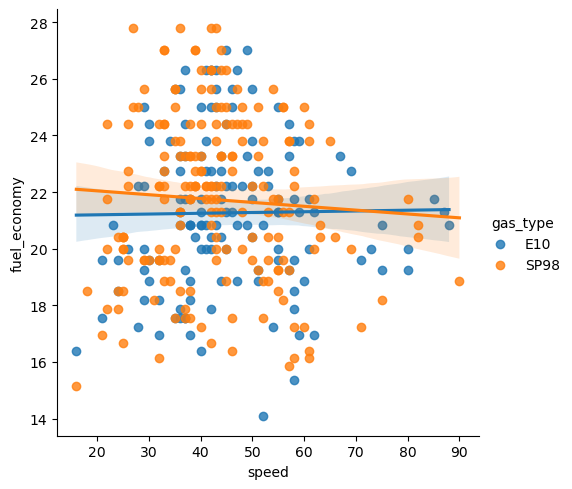

In [20]:
# check speed and fuel economy
sns.lmplot(df,x = "speed",y="fuel_economy", hue="gas_type")

<Axes: xlabel='AC', ylabel='fuel_economy'>

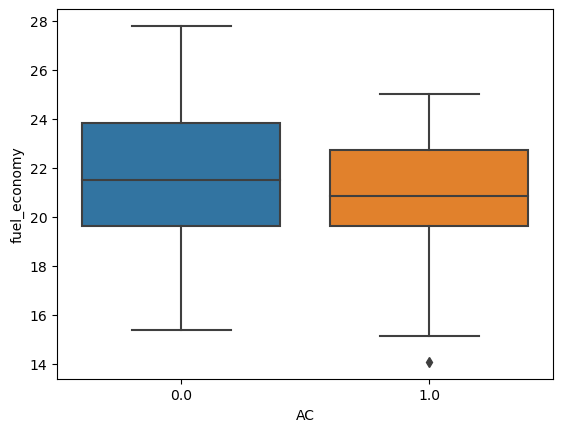

In [21]:
sns.boxplot(df, x = "AC", y = "fuel_economy")

In [22]:
df.loc[(df.fuel_economy > 9) & (df.fuel_economy < 12)].temp_outside.mean()

nan

<Axes: xlabel='temp_outside', ylabel='Count'>

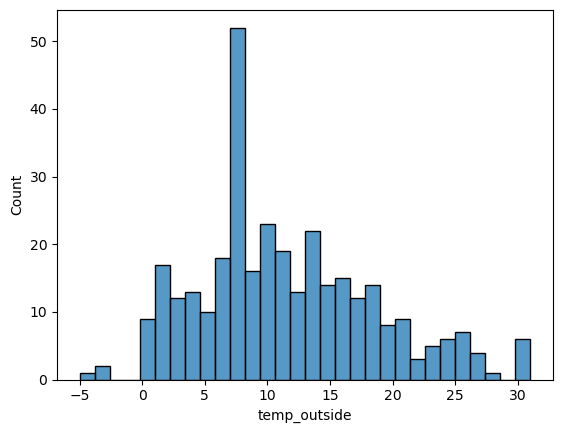

In [23]:
sns.histplot(df, x="temp_outside", stat="count",bins=30)

C:\Users\Shach\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


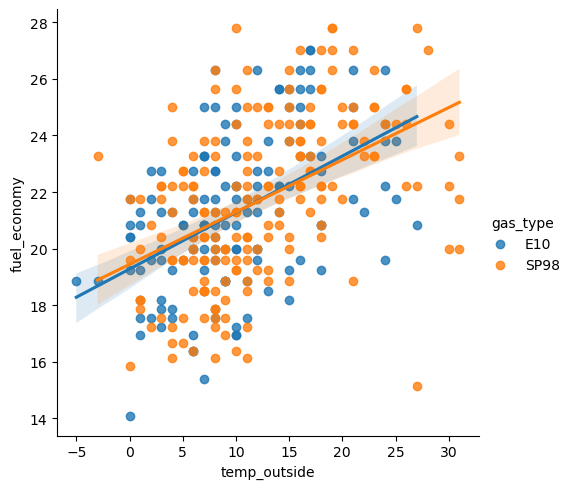

In [24]:
sns.lmplot(df,x = "temp_outside",y="fuel_economy", hue="gas_type")

C:\Users\Shach\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


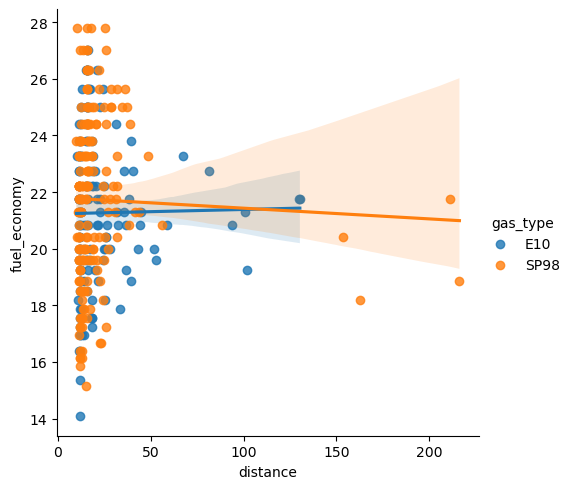

In [25]:
sns.lmplot(df, x="distance",y="fuel_economy", hue="gas_type")

C:\Users\Shach\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


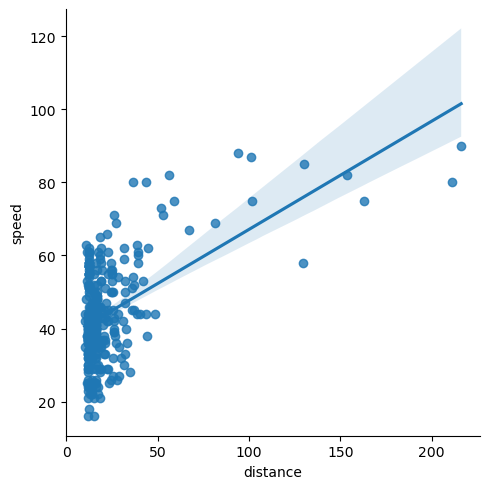

In [26]:
sns.lmplot(df, x="distance",y="speed")